In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-dataset/mushroom_cleaned.csv


In [2]:
#Importing the data
df = pd.read_csv("/kaggle/input/mushroom-dataset/mushroom_cleaned.csv")
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [3]:
#Check for datatypes of the dataset
df.dtypes

cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object

In [4]:
#Check for the null values
df.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

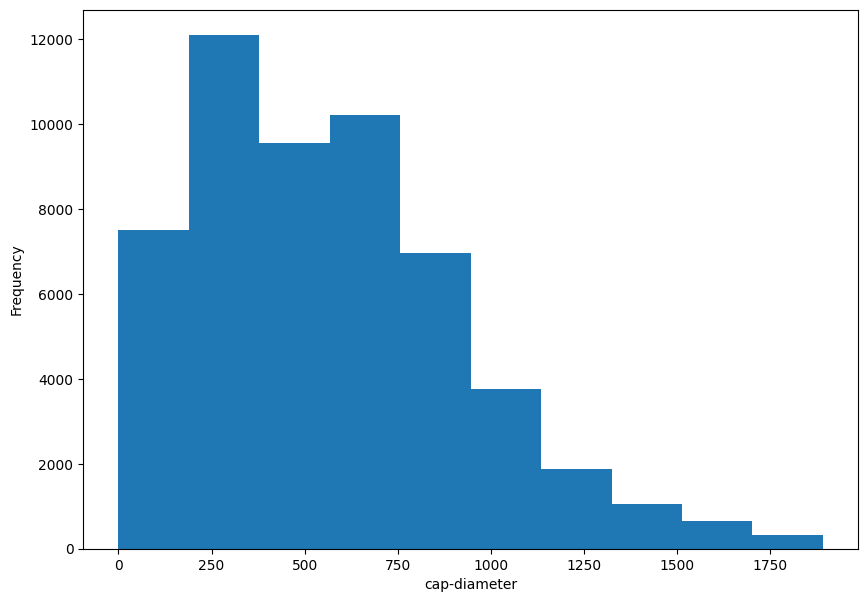

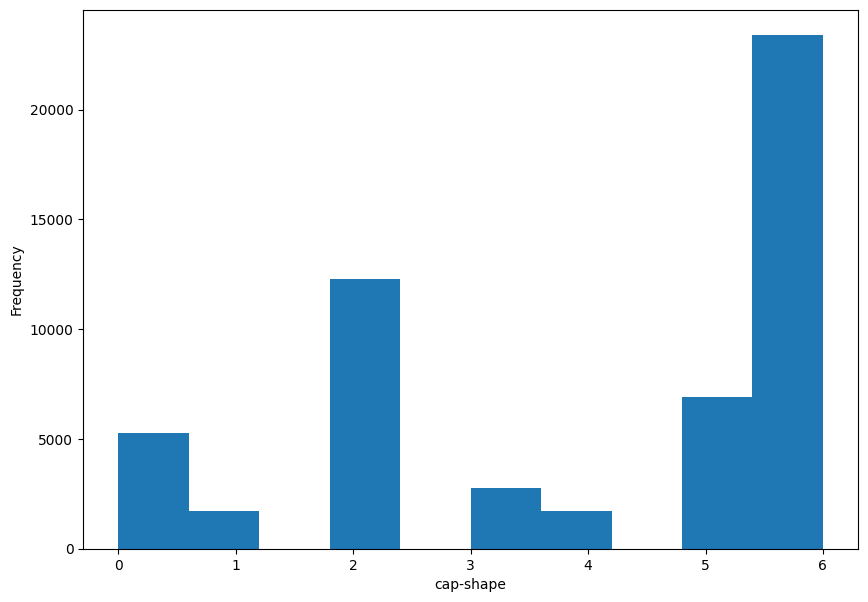

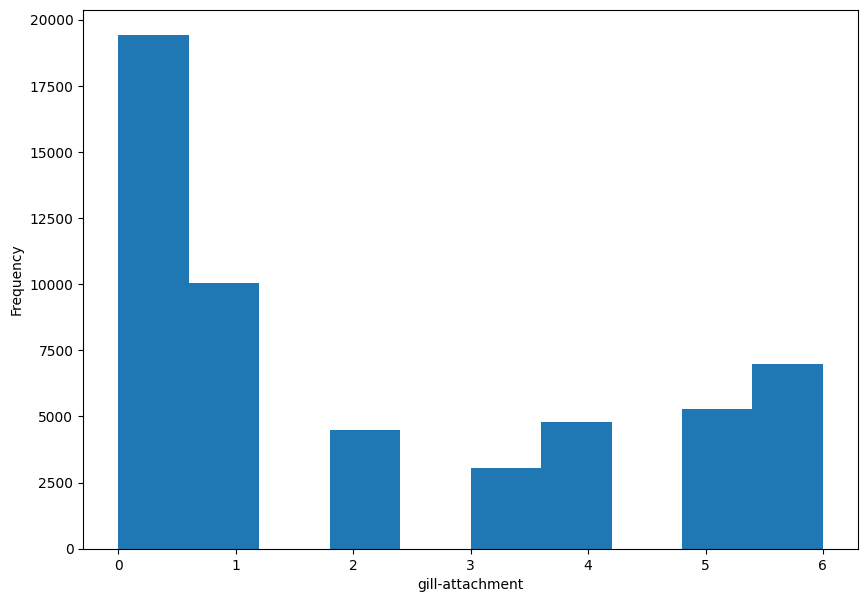

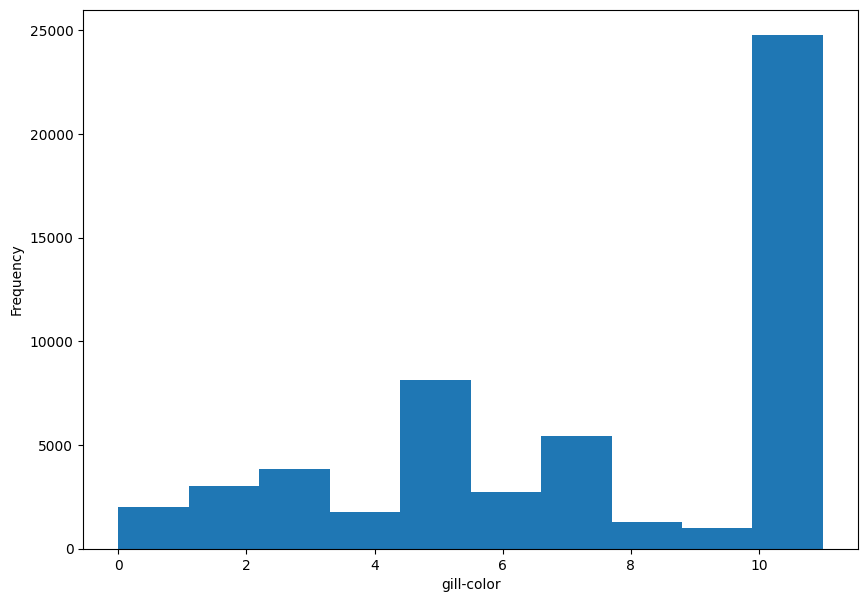

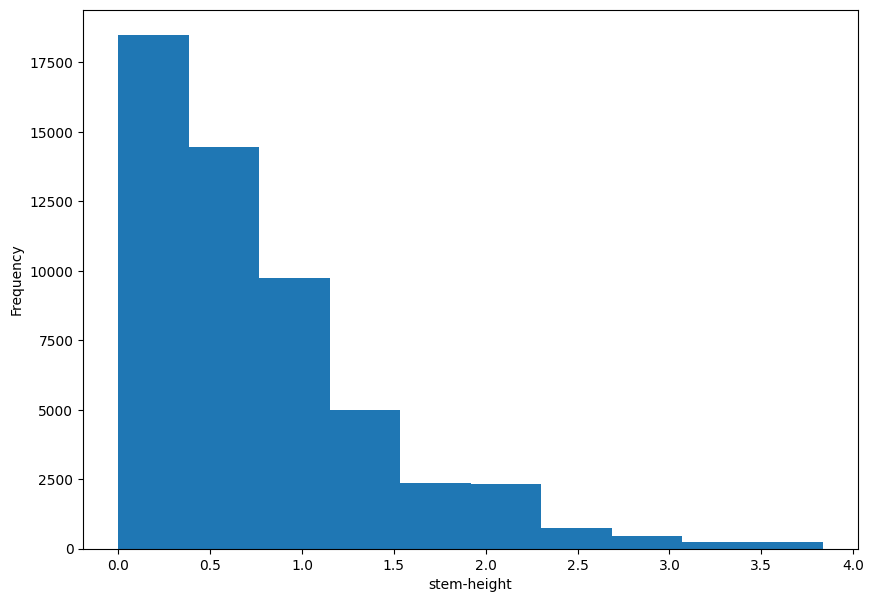

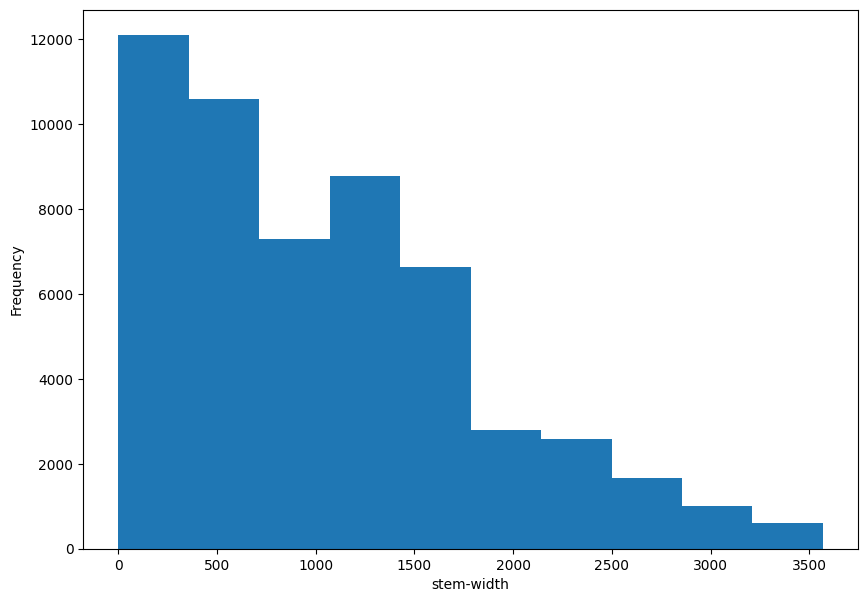

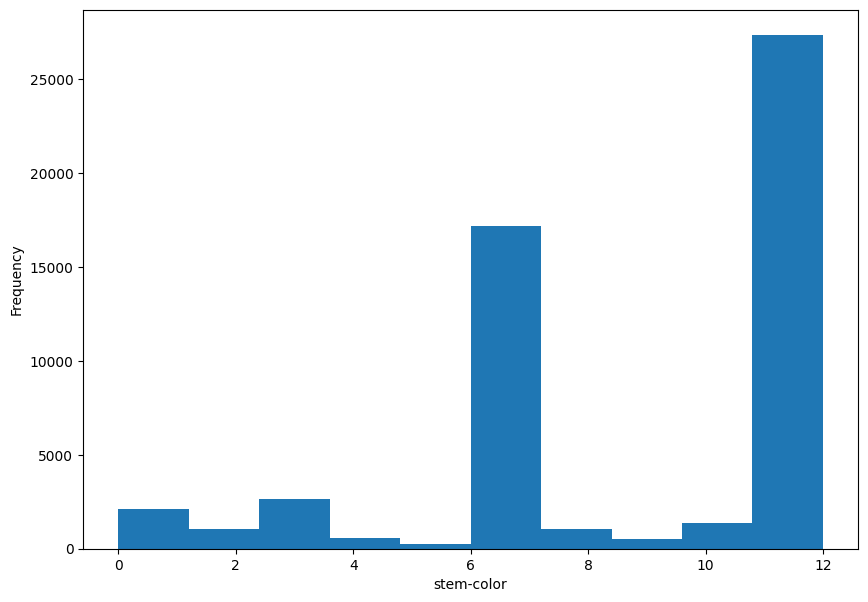

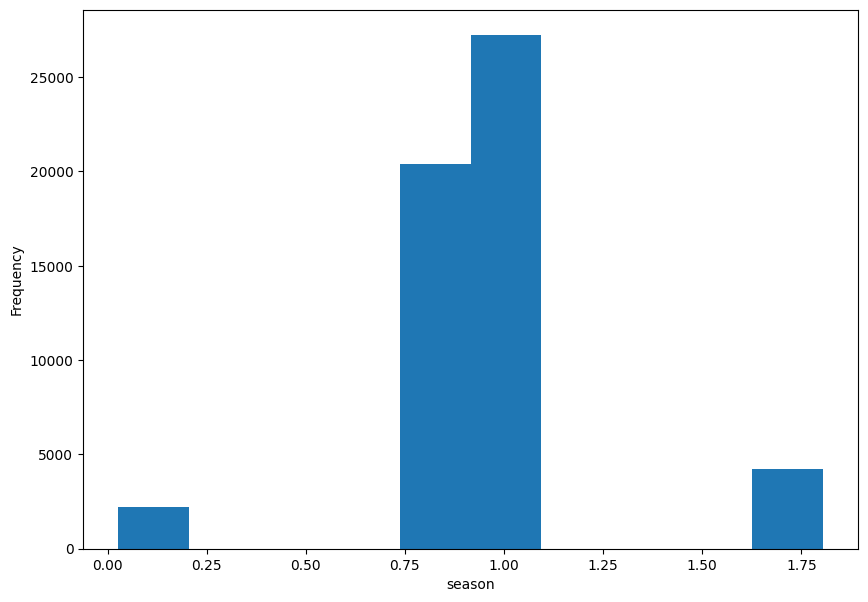

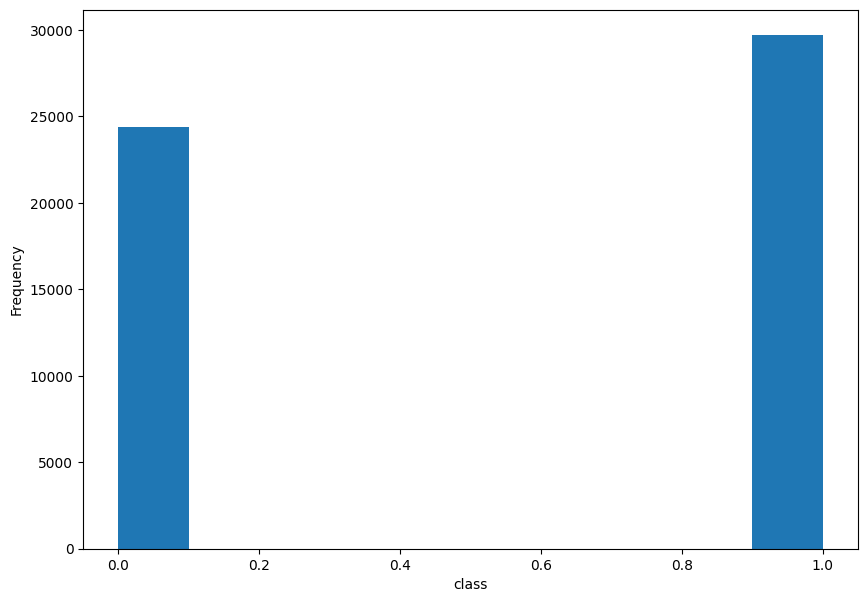

<Figure size 640x480 with 0 Axes>

In [5]:
#Plotting histograms of each feature seperately
import matplotlib.pyplot as plt
for item in df:
    df[item].plot(kind='hist', figsize = (10,7))
    plt.xlabel(item)
    plt.figure()

In [6]:
#Defining X and y
X = df.drop(columns=['class'], axis = 1)
y= df['class']

In [7]:
X.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
0,1372,2,2,10,3.807467,1545,11,1.804273
1,1461,2,2,10,3.807467,1557,11,1.804273
2,1371,2,2,10,3.612496,1566,11,1.804273
3,1261,6,2,10,3.787572,1566,11,1.804273
4,1305,6,2,10,3.711971,1464,11,0.943195


In [15]:
X.shape

(54035, 8)

In [8]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [9]:
#Splitting the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 0.71641362, -0.92248933, -0.95948901, ...,  1.76251598,
        -0.74211062,  2.80141882],
       [ 0.00922002,  0.92730337, -0.06204349, ..., -0.37225305,
        -1.3552831 , -0.02654537],
       [ 1.53731286, -0.92248933, -0.95948901, ...,  1.13561909,
         0.79082058, -0.02654537],
       ...,
       [ 1.99490872,  0.92730337,  1.2841248 , ...,  0.8406839 ,
        -0.74211062, -0.20633721],
       [-0.8421856 ,  0.92730337, -0.95948901, ..., -0.61101011,
        -2.27504181,  2.80141882],
       [-0.42064275,  0.92730337,  1.73284756, ..., -0.61611722,
         0.79082058, -0.20633721]])

In [12]:
#Building first simple model with 20 epochs

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model_1 = Sequential([
    Dense(1, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = (['accuracy']))

history_1 = model_1.fit(X_train, y_train, epochs = 20, batch_size=32)

Epoch 1/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5488 - loss: 0.6894
Epoch 2/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5504 - loss: 0.6857
Epoch 3/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5500 - loss: 0.6844
Epoch 4/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5551 - loss: 0.6827
Epoch 5/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5556 - loss: 0.6812
Epoch 6/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5467 - loss: 0.6819
Epoch 7/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5511 - loss: 0.6814
Epoch 8/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5491 - loss: 0.6813
Epoch 9/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5515 - loss: 0.6808
Epoch 10/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5534 - loss: 0.6808
Epoch 11/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5481 - loss: 0.6813
Epoch 12/20
1351/1351 ━━━━━━━━

<Axes: >

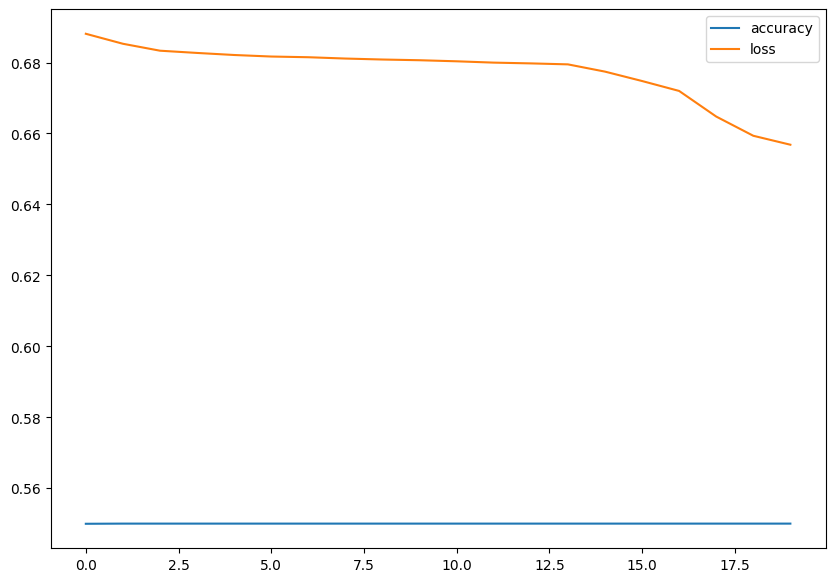

In [13]:
pd.DataFrame(history_1.history).plot(figsize=(10,7))

In [16]:
#Building more complex model

model_2 = Sequential([
    Dense(8, activation = 'relu'),
    Dense(8, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = (['accuracy']))

history_2 = model_2.fit(X_train, y_train, epochs = 20, batch_size=32)

Epoch 1/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5015 - loss: 17.3160
Epoch 2/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5716 - loss: 1.0127
Epoch 3/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5774 - loss: 0.8773
Epoch 4/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5998 - loss: 0.7217
Epoch 5/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6086 - loss: 0.7165
Epoch 6/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6069 - loss: 0.7036
Epoch 7/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6165 - loss: 0.7074
Epoch 8/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6215 - loss: 0.6868
Epoch 9/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6180 - loss: 0.7036
Epoch 10/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6270 - loss: 0.6688
Epoch 11/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6197 - loss: 0.7176
Epoch 12/20
1351/1351 ━━━━━━━

<Axes: >

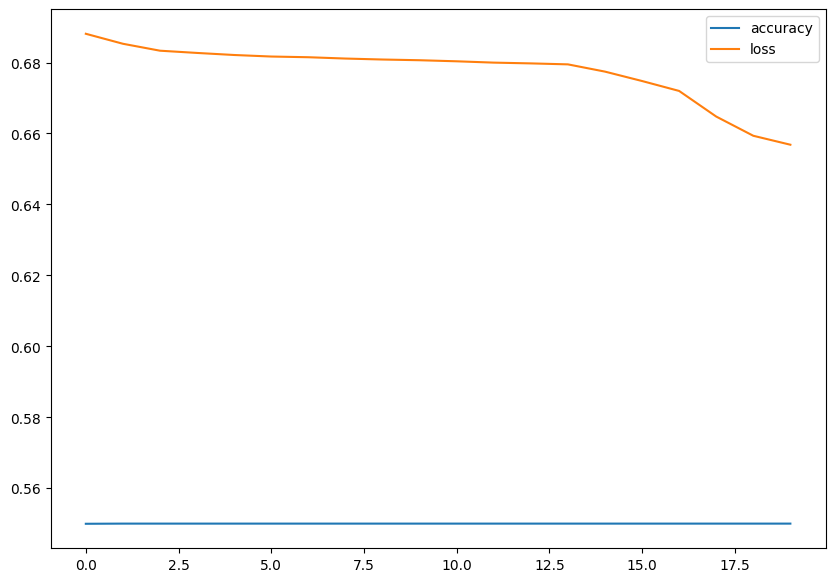

In [17]:
pd.DataFrame(history_1.history).plot(figsize=(10,7))

In [19]:
#Finding the best learning rate

model_3 = Sequential([
    Dense(8, activation = 'relu'),
    Dense(8, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = (['accuracy']))

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/4))

history_3 = model_3.fit(X_train, y_train, epochs = 20, batch_size=32, callbacks = [lr_scheduler])

Epoch 1/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4599 - loss: 4.8510 - learning_rate: 1.0000e-04
Epoch 2/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5328 - loss: 0.7290 - learning_rate: 1.7783e-04
Epoch 3/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5649 - loss: 0.6813 - learning_rate: 3.1623e-04
Epoch 4/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5905 - loss: 0.6624 - learning_rate: 5.6234e-04
Epoch 5/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5790 - loss: 0.6592 - learning_rate: 0.0010
Epoch 6/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5816 - loss: 0.6610 - learning_rate: 0.0018
Epoch 7/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5482 - loss: 0.6672 - learning_rate: 0.0032
Epoch 8/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5488 - loss: 0.6715 - learning_rate: 0.0056
Epoch 9/20
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5480 - loss: 0.6727 

Text(0, 0.5, 'Loss')

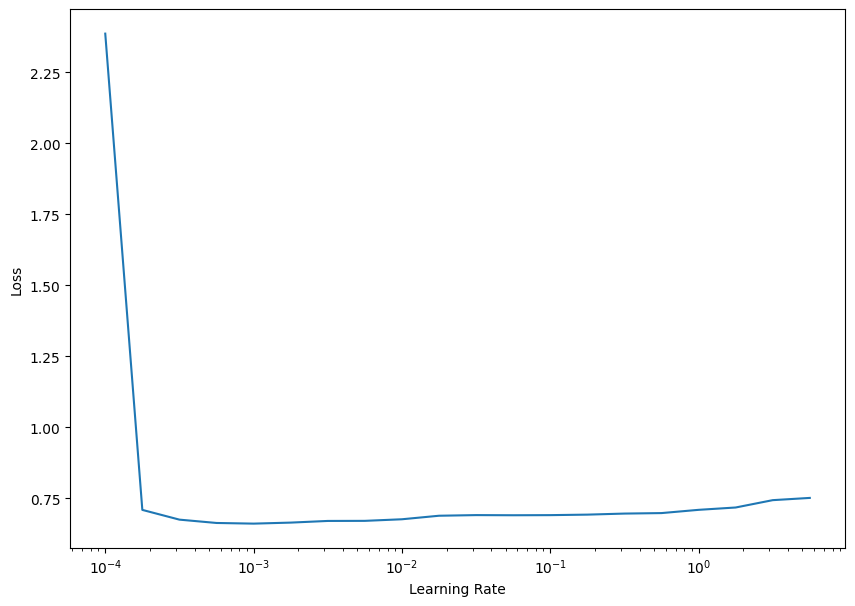

In [21]:
#Plotting learning rate vs Loss
lrs = 1e-4 * (10**(tf.range(20)/4))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_3.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

In [57]:
#Trying to build model with a learning rate = 0.0002 

model_4 = Sequential([
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0002),
                metrics = (['accuracy']))

history_4 = model_4.fit(X_train, y_train, epochs = 200, batch_size = 32)

Epoch 1/200
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5617 - loss: 0.7934
Epoch 2/200
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5956 - loss: 0.6623
Epoch 3/200
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6007 - loss: 0.6555
Epoch 4/200
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5915 - loss: 0.6535
Epoch 5/200
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6048 - loss: 0.6475
Epoch 6/200
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6044 - loss: 0.6440
Epoch 7/200
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6145 - loss: 0.6412
Epoch 8/200
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6305 - loss: 0.6222
Epoch 9/200
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6531 - loss: 0.5997
Epoch 10/200
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6543 - loss: 0.5902
Epoch 11/200
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6642 - loss: 0.5826
Epoch 12/200
1351/1

In [58]:
#Evaluating the model 4
model_4.evaluate(X_test, y_test)

338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9706 - loss: 0.0869


[0.08851756155490875, 0.9683538675308228]

In [59]:
#Summary of the model 4
model_4.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,885 (105.02 KB)

 Trainable params: 8,961 (35.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,924 (70.02 KB)

<Axes: >

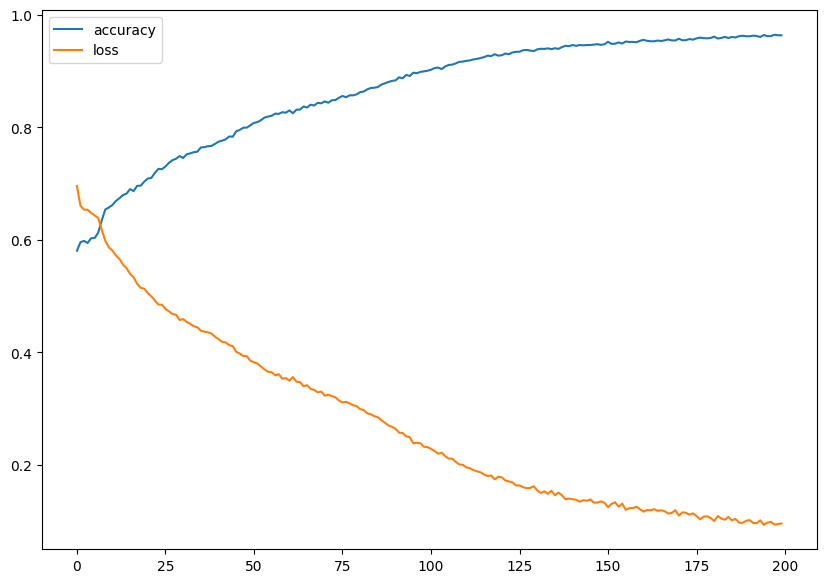

In [60]:
#Plotting Loss curve of the model 4
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [61]:
#Calculating and rounding predicted valeus to 0 and 1
y_pred = model_4.predict(X_test)
y_pred = np.round(y_pred)

338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [62]:
y_pred

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [63]:
#Calculating accuracy 
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9683538447302674

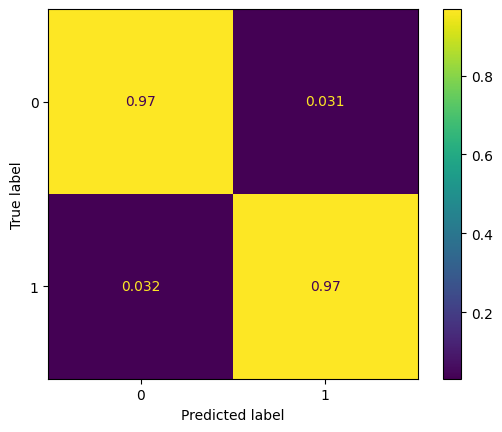

In [65]:
#Plotting confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import itertools
import numpy as np
import matplotlib.pyplot as plt

figsize=(10,10)

cm = confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm,
                              )

disp.plot()

plt.show()